In [1]:
import numpy as np
import sympy as sp
import PIL
from PIL import Image
import requests
from io import BytesIO

In [2]:
def preprocess(image):
    w, h = image.size
    w, h = map(lambda x: x - x % 32, (w, h))
    image = image.resize((w, h), resample=PIL.Image.LANCZOS)
    return 2.0 * image - 1.0

## Практическое задание

__1.__ Решить систему уравнений методом Гаусса:

$\begin{cases}
x_{1}+x_{2}-x_{3}-2x_{4}=0, \\
2x_{1}+x_{2}-x_{3}+x_{4}=-2, \\
x_{1}+x_{2}-3x_{3}+x_{4}=4.
\end{cases}$

In [3]:
A = np.matrix("1 1 -1 -2; 2 1 -1 1; 1 1 -3 1; 0 0 0 0")
B = np.matrix("0; -2; 4; 0")
# X = np.linalg.solve(A, B)
# X

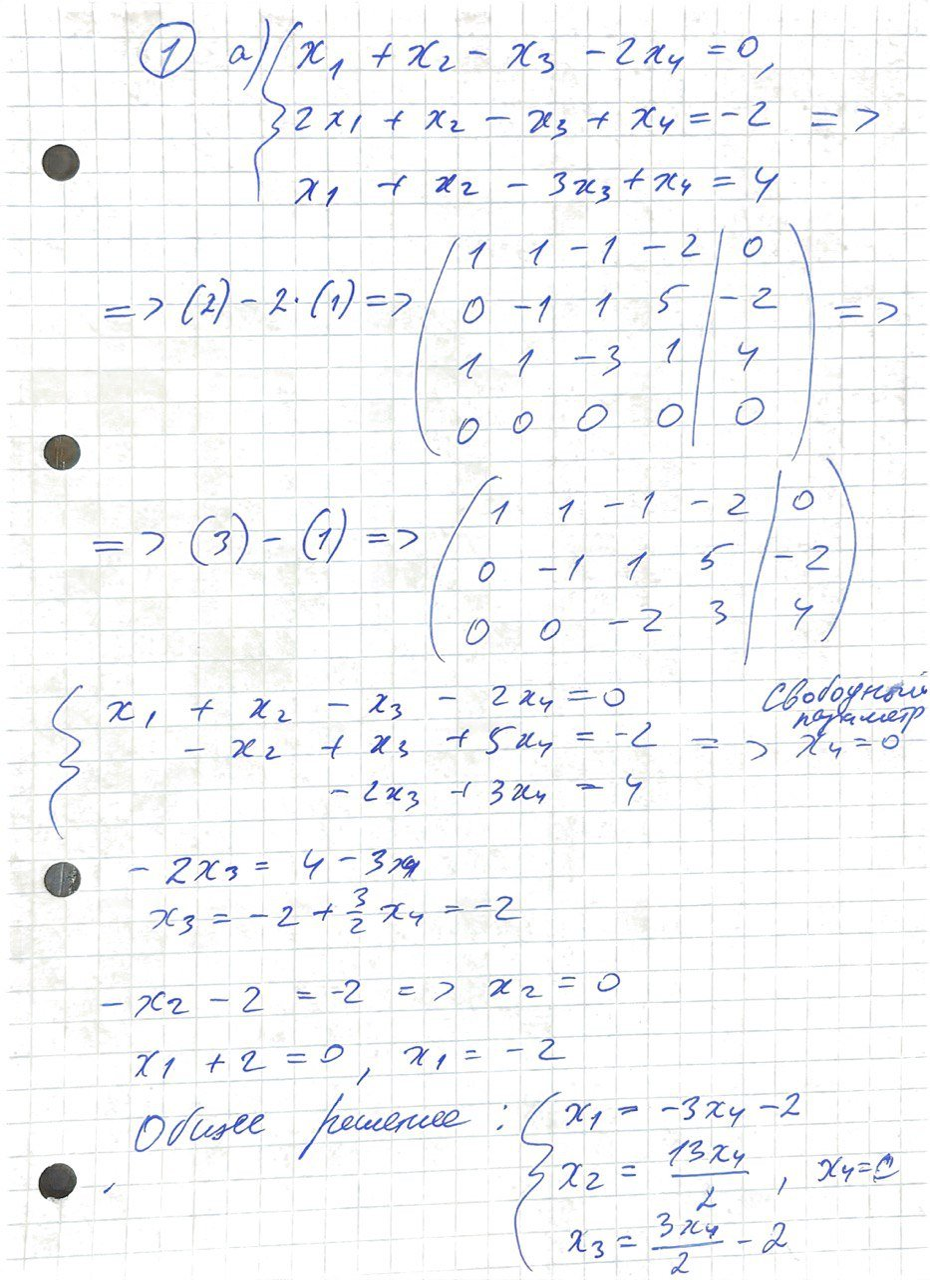

In [4]:
url = "https://thumb.cloud.mail.ru/weblink/thumb/xw1/2gFL/RG4QCxexc"
response = requests.get(url)
init_img = Image.open(BytesIO(response.content)).convert("RGB")
init_img = init_img.resize((930, 1280))
init_img

In [5]:
sp.Matrix([[1, 1, -1, -2], [2, 1, -1, 1], [1, 1, -3, 1], [0, 0, 0, 0]]).rank()

3

В этом случае система имеет бесконечное множество решений, и одна из неизвестных должна рассматриваться как свободный параметр, при любых значениях которого система будет иметь решение

In [6]:
x1, x2, x3, x4 = sp.symbols("x1, x2, x3, x4")
y1 = x1 + x2 - x3 - 2 * x4
y2 = 2 * x1 + x2 - x3 + x4 + 2
y3 = x1 + x2 - 3 * x3 + x4 - 4

sp.linsolve([y1, y2, y3], [x1, x2, x3, x4])

{(-3*x4 - 2, 13*x4/2, 3*x4/2 - 2, x4)}

In [7]:
A = sp.Matrix([[1, 1, -1, -2, 0], [2, 1, -1, 1, -2], [1, 1, -3, 1, 4], [0, 0, 0, 0, 0]])
A.rref()[0]

Matrix([
[1, 0, 0,     3, -2],
[0, 1, 0, -13/2,  0],
[0, 0, 1,  -3/2, -2],
[0, 0, 0,     0,  0]])

In [8]:
A.rref()[1]

(0, 1, 2)

Переменные, соответствующие ведущим столбцам, являются базисными

Получили общее решение, в котором свободная переменная $х_4$
может принимать произвольные действительные значения:

$\left( - 3 x_{4} - 2, \  \frac{13 x_{4}}{2}, \  \frac{3 x_{4}}{2} - 2, \  x_{4}\right)$

Базисное решение получается при значении $x_4 = 0:$

$x_{1} = - 2,~ x_{2} = 0,~ x_{3} = -2$

__2.__ Проверить на совместность и выяснить, сколько решений будет иметь система линейных уравнений:

   а) $\begin{cases}
3x_{1}-x_{2}+x_{3}=4, \\
2x_{1}-5x_{2}-3x_{3}=-17, \\
x_{1}+x_{2}-x_{3}=0;
\end{cases}$
    
   б) $\begin{cases}
2x_{1}-4x_{2}+6x_{3}=1, \\
x_{1}-2x_{2}+3x_{3}=-2, \\
3x_{1}-6x_{2}+9x_{3}=5;
\end{cases}$
    
   в) $\begin{cases}
x_{1}+2x_{2}+5x_{3}=4, \\
3x_{1}+x_{2}-8x_{3}=-2. 
\end{cases}$


Найдем ранги матриц системы и расширенной

In [9]:
A_2a = sp.Matrix([[3, -1, 1], [2, -5, -3], [1, 1, -1]])
A_2a.rank()

3

In [10]:
A_2ab = sp.Matrix([[3, -1, 1, 4], [2, -5, -3, -17], [1, 1, -1, 0]])
A_2ab.rank()

3

Совместная система имеет единственное решение, ранг
матрицы равен числу неизвестных

In [11]:
A_2ab.rref()[0]

Matrix([
[1, 0, 0, 1],
[0, 1, 0, 2],
[0, 0, 1, 3]])

In [12]:
A_2ab.rref()[1]

(0, 1, 2)

In [13]:
A_2b = sp.Matrix([[2, -4, 6], [1, -2, 3], [3, -6, 9]])
A_2b.rank()

1

In [14]:
A_2bb = sp.Matrix([[2, -4, 6, 1], [1, -2, 3, -2], [3, -6, 9, 5]])
A_2bb.rank()

2

Система несовместна

In [15]:
A_2bb.rref()[0]

Matrix([
[1, -2, 3, 0],
[0,  0, 0, 1],
[0,  0, 0, 0]])

In [16]:
A_2bb.rref()[1]

(0, 3)

In [17]:
A_2c = sp.Matrix([[1, 2, 5], [3, 1, -8]])
A_2c.rank()

2

In [18]:
A_2cb = sp.Matrix([[1, 2, 5, 4], [3, 1, -8, -2]])
A_2cb.rank()

2

Система имеет бесконечное множество решений

In [19]:
A_2cb.rref()[0]

Matrix([
[1, 0, -21/5, -8/5],
[0, 1,  23/5, 14/5]])

In [20]:
A_2cb.rref()[1]

(0, 1)

__3.__ Проверить на совместность и выяснить, сколько решений будет иметь система линейных уравнений, заданная расширенной матрицей

$\tilde{A}=\begin{pmatrix}
\left.\begin{matrix}
1 & 3 & -2 & 4\\ 
0 & 5 & 0 & 1\\ 
0 & 0 & 3 & 0\\ 
0 & 0 & 0 & 2
\end{matrix}\right|
\begin{matrix}
3\\ 
2\\
4\\
1
\end{matrix}
\end{pmatrix}.$

In [21]:
A_3 = sp.Matrix([[1, 3, -2, 4], [0, 5, 0, 1], [0, 0, 3, 0], [0, 0, 0, 2]])
A_3.rank()

4

In [22]:
A_3b = sp.Matrix([[1, 3, -2, 4, 3], [0, 5, 0, 1, 2], [0, 0, 3, 0, 4], [0, 0, 0, 2, 1]])
A_3b.rank()

4

Система совместна и имеет единственное решение

In [23]:
A_3b.rref()[0]

Matrix([
[1, 0, 0, 0, 83/30],
[0, 1, 0, 0,  3/10],
[0, 0, 1, 0,   4/3],
[0, 0, 0, 1,   1/2]])

In [24]:
A_3b.rref()[1]

(0, 1, 2, 3)

__4.__ Дана система линейных уравнений, заданная расширенной матрицей

$\tilde{A}=\begin{pmatrix}
\left.\begin{matrix}
1 & 2 & 3\\ 
4 & 5 & 6\\ 
7 & 8 & 9
\end{matrix}\right|
\begin{matrix}
a\\ 
b\\
c
\end{matrix}
\end{pmatrix}.$

Найти соотношение между параметрами $a$, $b$ и $c$, при которых система является несовместной.

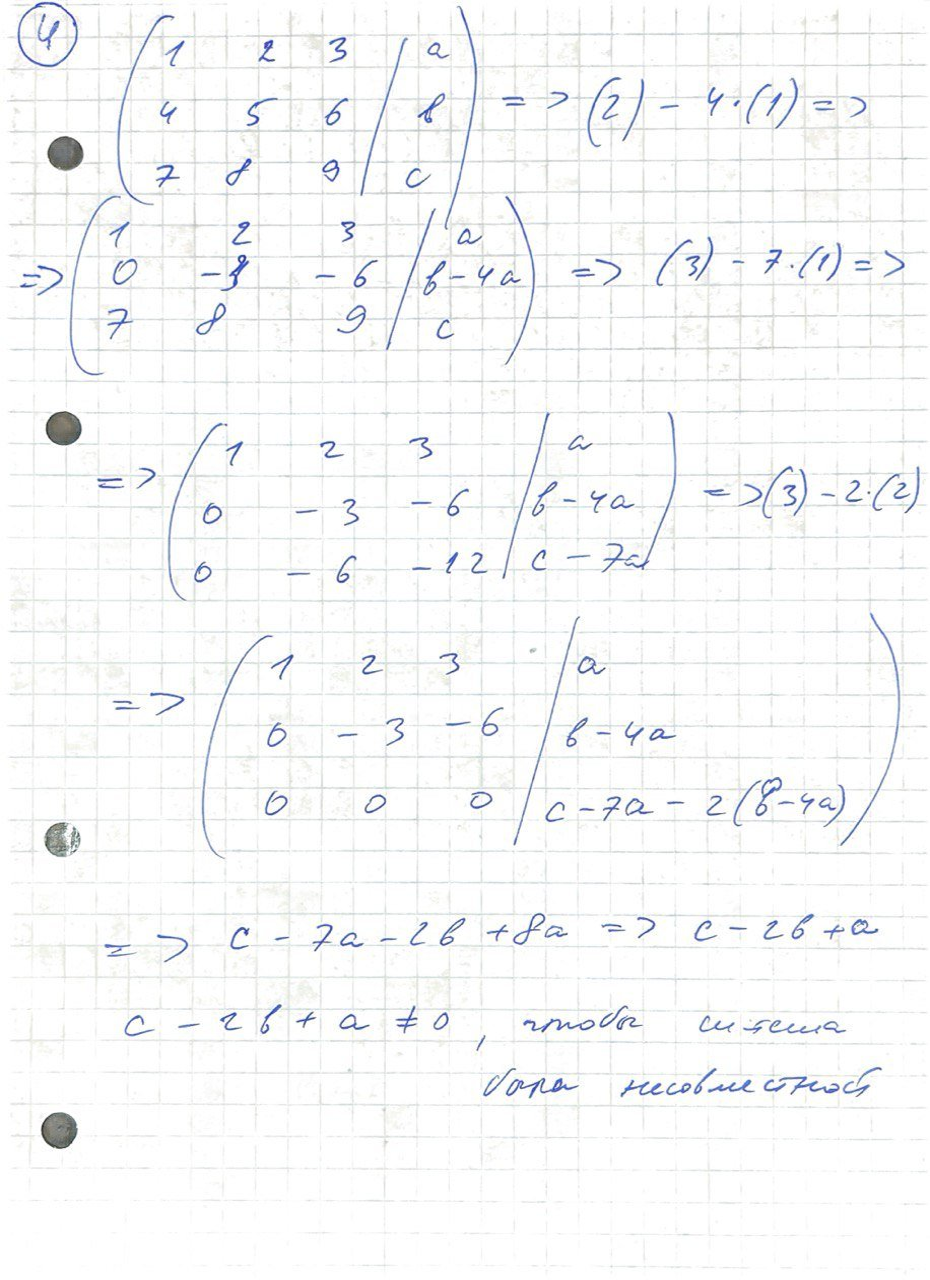

In [28]:
url = "https://thumb.cloud.mail.ru/weblink/thumb/xw1/iJRs/ZJnP7VBqL"
response = requests.get(url)
init_img = Image.open(BytesIO(response.content)).convert("RGB")
init_img = init_img.resize((930, 1280))
init_img